# Prepare Data
Here we prepare data as 1 min level kline for BTC from 2019.1.1 to 2020.5.2 in bitfinex exchange

In [1]:
#!python3 -m pip install -e .. -U
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta
from sklearn.metrics import roc_curve, auc

In [2]:
TZ = 'Asia/Shanghai'

In [3]:
data_path = './data/data'
data_platform_list = ['BITFINEX']
data_symbol_list = ['BTC']

data_df_list = []

In [4]:
for platform in data_platform_list:
    for symbol in data_symbol_list:
        pkl_file_path = data_path+'/'+symbol+'_USD_'+platform+'_latest.pkl'
        pandas_df = pd.read_pickle(pkl_file_path)
        #data_df_list.append(pkl_file.add_prefix(platform+'_'+symbol+':'))
        data_df_list.append(pandas_df)
data = pd.concat(data_df_list, axis=1)

# Feature Enginnering

Tactical indicators etc.

In [5]:
data['timestamp'] = data.index.tolist()

In [6]:
data

,open,high,low,close,volume,timestamp
2019-01-01 16:00:00+08:00,3850.000000,3850.000000,3849.600000,3849.600000,0.443293,2019-01-01 16:00:00+08:00
2019-01-01 16:01:00+08:00,3849.500000,3853.000000,3849.400000,3853.000000,9.085920,2019-01-01 16:01:00+08:00
2019-01-01 16:02:00+08:00,3853.000000,3857.000000,3852.960000,3853.200000,8.213360,2019-01-01 16:02:00+08:00
2019-01-01 16:03:00+08:00,3853.000000,3853.100000,3851.200000,3852.200000,6.385190,2019-01-01 16:03:00+08:00
2019-01-01 16:04:00+08:00,3852.200000,3852.300000,3852.200000,3852.300000,0.504622,2019-01-01 16:04:00+08:00
...,...,...,...,...,...,...
2020-11-07 15:55:00+08:00,15428.349581,15437.000000,15428.000000,15436.374894,1.040375,2020-11-07 15:55:00+08:00
2020-11-07 15:56:00+08:00,15434.000000,15447.000000,15434.000000,15443.000000,5.073000,2020-11-07 15:56:00+08:00
2020-11-07 15:57:00+08:00,15441.000000,15446.000000,15441.000000,15446.000000,1.608000,2020-11-07 15:57:00+08:00
2020-11-07 15:58:00+08:00,15443.786243,15443.786243,15430.460723,15430.460723,0.692501,2020-11-07 15:58:00+08:00


In [7]:
# Prepare features
import talib

# Moving averages
data['ma5m'] = talib.MA(data['close'], timeperiod = 5) / data['close'] 
data['ma10m'] = talib.MA(data['close'], timeperiod = 10) / data['close'] 
data['ma1h'] = talib.MA(data['close'], timeperiod = 60) / data['close'] 
data['ma4h'] = talib.MA(data['close'], timeperiod = 240) / data['close'] 
data['ma12h'] = talib.MA(data['close'], timeperiod = 720) / data['close'] 
data['ma1d'] = talib.MA(data['close'], timeperiod = 1440) / data['close']
data['ma5d'] = talib.MA(data['close'], timeperiod = 7200) / data['close'] 
data['ma10d'] = talib.MA(data['close'], timeperiod = 14400) / data['close'] 
data['ma30d'] = talib.MA(data['close'], timeperiod = 43200) / data['close'] 


# Standard deviation
data['std5m'] = talib.STDDEV(data['close'], timeperiod=5)/ data['close'] 
data['std10m'] = talib.STDDEV(data['close'], timeperiod = 10) / data['close'] 
data['std1h'] = talib.STDDEV(data['close'], timeperiod = 60) / data['close'] 
data['std4h'] = talib.STDDEV(data['close'], timeperiod = 240) / data['close'] 
data['std12h'] = talib.STDDEV(data['close'], timeperiod = 720) / data['close'] 
data['std1d'] = talib.STDDEV(data['close'], timeperiod = 1440) / data['close']
data['std5d'] = talib.STDDEV(data['close'], timeperiod = 7200) / data['close'] 
data['std10d'] = talib.STDDEV(data['close'], timeperiod = 14400) / data['close'] 
data['std30d'] = talib.STDDEV(data['close'], timeperiod = 43200) / data['close'] 

# Closeness to hundred / thousand
data['dis100'] = (data['close'] % 100) / 100 
data['dis1000'] = (data['close'] % 1000) / 1000 



In [8]:
data['up_5%_in_1d_label'] = data['close'] > data['close'].shift(-1440) * 1.05

In [9]:
data=data.dropna()

# Simple Strategy Example

## Prepare data feed

# Machine Learning Strategy Example

refernces: https://towardsdatascience.com/model-design-and-selection-with-scikit-learn-18a29041d02a

## Dataset Preparation

In [10]:
train_start_time = pd.Timestamp('2019-01-01', tz=TZ)
train_end_time = pd.Timestamp('2019-12-31', tz=TZ)
val_start_time = pd.Timestamp('2020-01-01', tz=TZ)
val_end_time = pd.Timestamp('2020-06-01', tz=TZ)
test_start_time = pd.Timestamp('2020-06-01', tz=TZ)
test_end_time = pd.Timestamp('2020-11-01', tz=TZ)

train_data = data.loc[train_start_time:train_end_time]
val_data = data.loc[train_start_time:train_end_time]
test_data = data.loc[test_start_time:test_end_time]

In [11]:
feature_set = ['ma5m','ma10m','ma1h','ma4h','ma12h','ma1d','ma5d','ma10d','ma30d', \
               'std5m','std10m','std1h','std4h','std12h','std1d','std5d','std10d','std30d',\
               'dis100', 'dis1000']
label = ['up_5%_in_1d_label']

X_train = train_data[feature_set]
y_train = train_data[label]
X_val = train_data[feature_set]
y_val = train_data[label]
X_test = test_data[feature_set]
y_test = test_data[label]

In [12]:
y_train.sum() / y_train.count()

up_5%_in_1d_label    0.062166
dtype: float64

## Define model and hyperparameter

In [13]:
# For reading, visualizing, and preprocessing data
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE, RFECV
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.ensemble import GradientBoostingClassifier

### Initialize Sample Reweighting

In [14]:
from sample_reweight import SampleReweight

In [36]:
LIMITED_SAMPLE = False
EXAMPLES = 40000 if LIMITED_SAMPLE else X_train.shape[0]

# number of submodels
K = 5

# initialize sample weights and parameters
w = np.ones(X_train.shape[0])[:EXAMPLES]

ALPHA_1 = 1
ALPHA_2 = 1
NUM_BINS = 10
GAMMA = 0.9

# initialize sample reweighting
SR = SampleReweight(X_train[:EXAMPLES], y_train[:EXAMPLES].to_numpy(dtype=int), a1=ALPHA_1, a2=ALPHA_2, b=NUM_BINS, gamma=GAMMA)

### Define model

In [37]:
clfs = [GradientBoostingClassifier(random_state=0) for i in range(K)]

### Train Sub-model Loops

In [38]:
try:
    from tqdm import tqdm
    submodels = tqdm(clfs)
except ImportError:
    submodels = clfs

for model in submodels:
    model.fit(X_train[:EXAMPLES], y_train[:EXAMPLES], sample_weight=w)
    staged_pred = []
    
    for i, pred in enumerate(model.staged_predict_proba(X_train[:EXAMPLES])):
        staged_pred.append(np.log(pred))
    
    w = SR.reweight(model, staged_pred)
    print(np.max(w))

  0%|                                                                                            | 0/5 [00:00<?, ?it/s]C:\Users\Yuan\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
 20%|████████████████▌                                                                  | 1/5 [04:34<18:17, 274.31s/it]

10.457153313122207


C:\Users\Yuan\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
 40%|█████████████████████████████████▏                                                 | 2/5 [04:47<09:48, 196.01s/it]

12.504326344662854


C:\Users\Yuan\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
 60%|█████████████████████████████████████████████████▊                                 | 3/5 [09:21<07:18, 219.35s/it]

48.67968564700677


C:\Users\Yuan\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
 80%|██████████████████████████████████████████████████████████████████▍                | 4/5 [13:52<03:54, 234.80s/it]

15.900784049744301


C:\Users\Yuan\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [18:22<00:00, 220.54s/it]

44.98392038629978


In [39]:
y_score = np.mean(np.asarray([clf.decision_function(X_test) for clf in clfs]), axis=0)
print([clf.decision_function(X_test) for clf in clfs][1])
print(y_score)

[-2.99310306 -2.99310306 -2.99310306 ... -2.99310306 -2.99310306
 -2.99310306]
[-4.47557647 -4.41168991 -4.55707024 ... -3.65129636 -3.65129636
 -3.66062884]


## Evaluate Model

In [40]:
def plot_roc(labels, scores):
    lw = 2
    fpr, tpr, _ = roc_curve(labels, scores)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='(AUC = %0.3f)' % (roc_auc))
    #plt.plot([eer], [1-eer], marker='o', markersize=5, color="navy")
    #plt.plot([0, 1], [1, 0], color='navy', lw=1, linestyle=':')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")

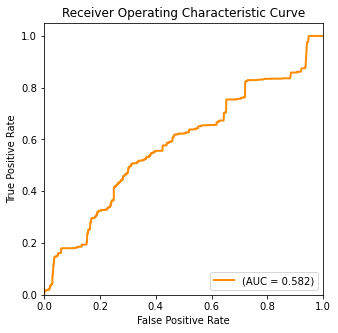

In [41]:
plot_roc(y_test, y_score)